# Projeto 2 - Ciência de Dados

**Integrantes:**
- Pedro de Souza (Turma 2A)
- Tomás Fiorelli Barbosa (Turma 2B)

**Link da base de dados no Kaggle**: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Introdução
O objetivo desse projeto é, a partir de uma análise exploratória de uma base de dados, utilizar modelos estatísticos de previsão para prever uma variável principal e dependente, o target, com outras variáveis independentes, as features.
No caso, a base de dados escolhida pelo grupo, "Heart Attack Analysis & Prediction Dataset", retirada do site Kaggle, traz diversas informações médicas, de vários pacientes, ligadas ao coração como os tipos de dores no peito e a quantidade de açucar no sangue, exemplos de features. Assim, o grupo formulou a seginte pergunta a ser respondida, o target: 'O paciente tem mais ou menos chances de sofrer um ataque cardíaco?".

## Minerando Dados

In [77]:
# Bibliotecas Importadas
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
dados = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')

In [79]:
dados

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Variáveis (Features)

- **Age**: Age of the patient
- **Sex**: Sex of the patient
- **cp**: Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **trtbps**: resting blood pressure (in mm Hg)
- **chol**: cholestoral in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl) (0 = false; 1 = true)
- **restecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: maximum heart rate achieved
- **exng**: exercise induced angina (0 = no; 1 = yes)
- **oldpeak**: previous peak
- **slp**: slope
- **caa**: number of major vessels (0-3)
- **thall**: thall rate
- **output (target)**: 0 = less chance of heart attack; 1 = more chance of heart attack



## Análise Exploratória

Com os dados prontos para exploração, o grupo realizou uma breve análise exploratória para encontrar associações entre as variáveis independentes e a variável em estudo (*output*). Devido ao grande número de variáveis, dividimos entre os tipos de variáveis para organizarmos o *Notebook*.

### Variáveis Qualitativas

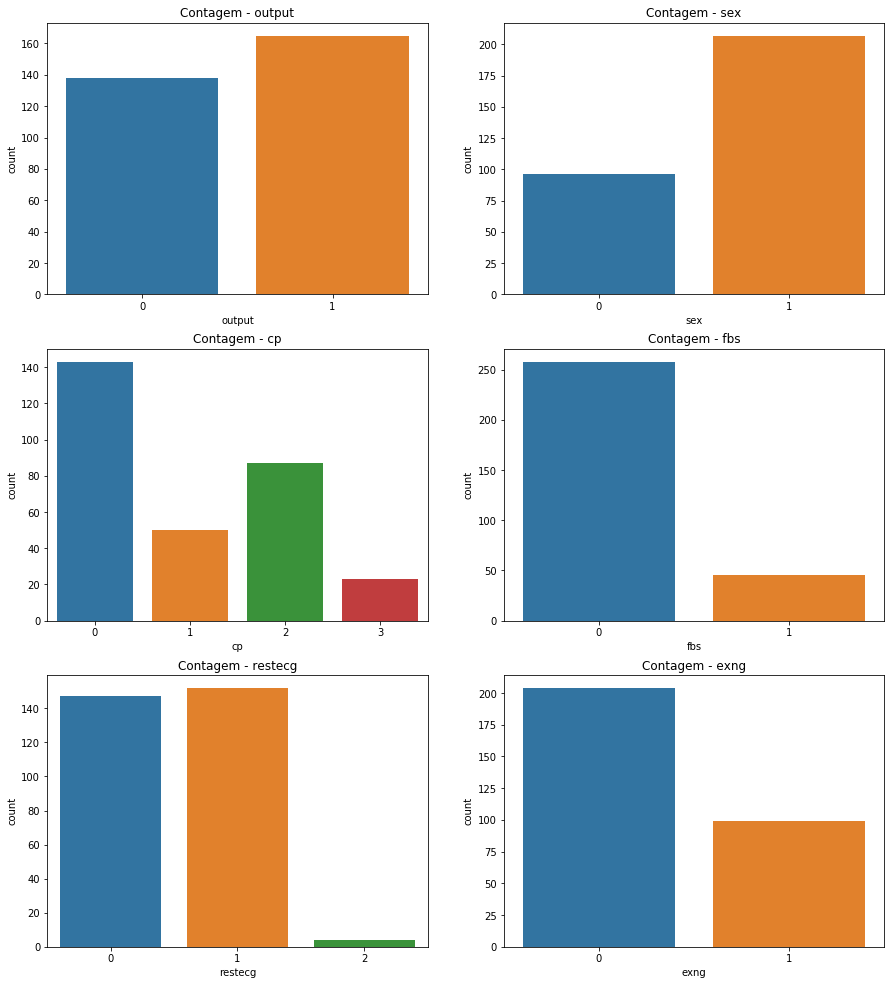

In [81]:
variaveis_qualitativas = ['output', 'sex', 'cp', 'fbs', 'restecg', 'exng']
i = 0

plt.figure(figsize=(15, 17))

for var_quali in variaveis_qualitativas:
    plt.subplot(321+i)
    plt.title(f'Contagem - {var_quali}')
    sns.countplot(x=dados[f'{var_quali}'])
    i += 1

plt.show()

In [82]:
dados['output'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

54,46% dos pacientes possuem uma maior chance de sofrer ataque do coração. <br>
45,54% dos pacientes possuem uma baixa chance de sofrer ataque do coração.

In [83]:
pd.crosstab(dados['output'], dados['sex'], normalize='columns', margins=True)

sex,0,1,All
output,,,
0,0.25,0.550725,0.455446
1,0.75,0.449275,0.544554


In [84]:
pd.crosstab(dados['output'], dados['cp'], normalize='columns', margins=True)

cp,0,1,2,3,All
output,,,,,
0,0.727273,0.18,0.206897,0.304348,0.455446
1,0.272727,0.82,0.793103,0.695652,0.544554


In [85]:
pd.crosstab(dados['output'], dados['fbs'], normalize='columns', margins=True)

fbs,0,1,All
output,,,
0,0.449612,0.488889,0.455446
1,0.550388,0.511111,0.544554


In [86]:
pd.crosstab(dados['output'], dados['restecg'], normalize='columns', margins=True)

restecg,0,1,2,All
output,,,,
0,0.537415,0.368421,0.75,0.455446
1,0.462585,0.631579,0.25,0.544554


In [87]:
pd.crosstab(dados['output'], dados['exng'], normalize='columns', margins=True)

exng,0,1,All
output,,,
0,0.303922,0.767677,0.455446
1,0.696078,0.232323,0.544554


Inicialmente foi feita uma contagem em gráficos de barra das variáveis quantitativas para visualizar de forma mais compreensiva os dados presentes no dataset. Em seguida, utilizou-se de tabelas cruzadas para obter os valores relativos de cada variável, em função do *output*.

### Variáveis Quantitativas 
Para as variáveis do tipo quantitativas, o grupo utilizou o gráfico de boxplot, pois ele mostra a distribuição de dados quantitativos de uma forma que facilita comparações entre os valores de *output*.

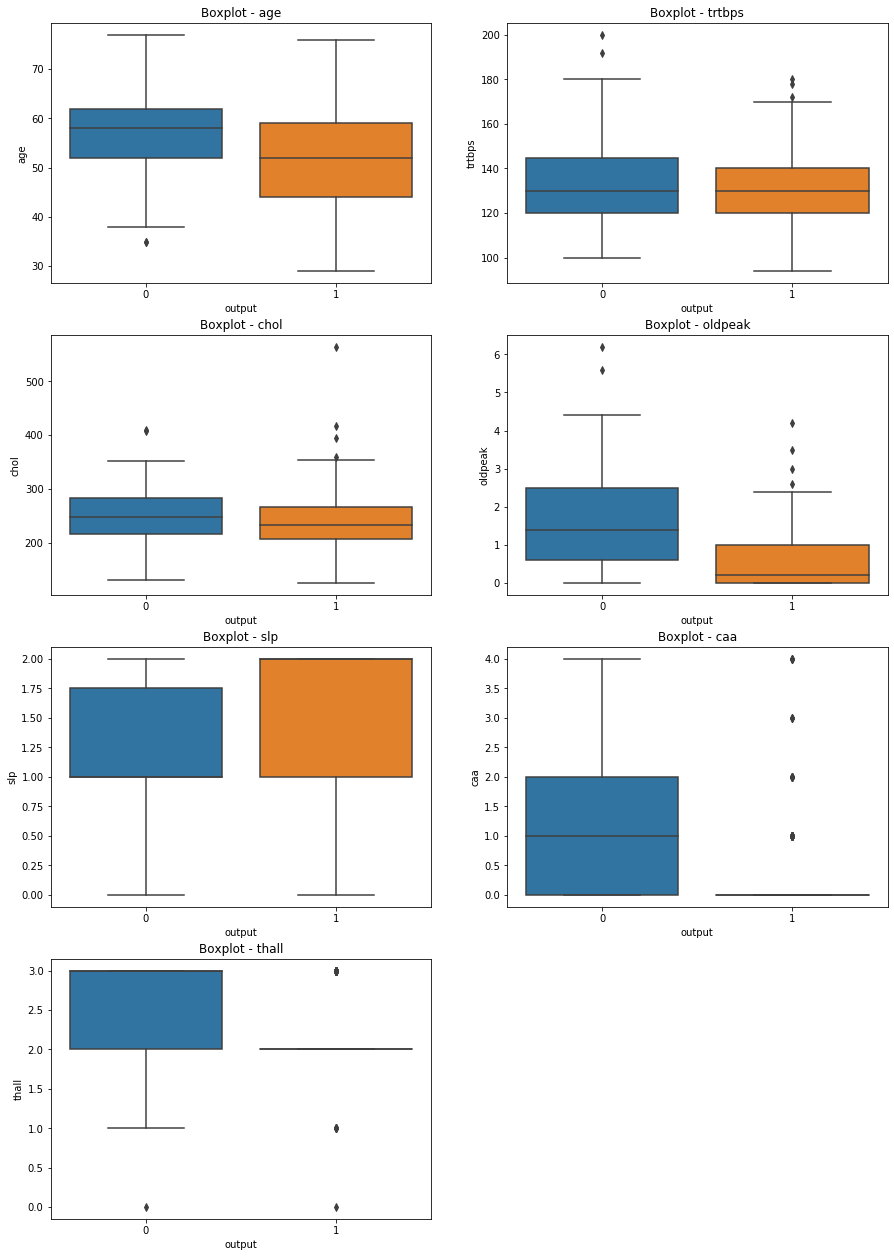

In [88]:
variaveis_quantitativas = ['age', 'trtbps', 'chol', 'oldpeak', 'slp', 'caa', 'thall']
i = 0

plt.figure(figsize=(15, 22))

for var_quant in variaveis_quantitativas:
    plt.subplot(421+i)
    sns.boxplot(dados['output'], dados[f'{var_quant}'])
    plt.title(f'Boxplot - {var_quant}')
    plt.xlabel('output')
    plt.ylabel(f'{var_quant}')
    i += 1

plt.show()

## Modelos de Predição

### Regressão Logística
O primeiro modelo escolhido pelo grupo foi o de Regressão Logística, que estima a probabilidade de ocorrência de uma variável dependente, ou o melhor, do target. Essa variável é binária, ou seja, é definida como 0 ou 1. No tema escolhido pelo grupo, o 0 signfica menos chance de sofrer um ataque cardíaco e o 1 significa mais chance de sofrer um ataque cardíaco. Esse modelo é ideal para o tema escolhido desde que todas as variáveis são qualitativas e independentes, requisitos importantes para que a regressão apresente um bom resultado.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

É utilizado uma parte da base de dados para treino do modelo e uma base para testar se o modelo apresenta ou não uma boa acurácia. Para que a quantidade de 1 e 0 esteja balanceada, permitindo um melhor resultado desde que a seleção é aletória, o grupo se adiantou e aplicou a função SMOTE, da biblioteca "imblearn.over_sampling" que é responsável por justamente balancear os valores. Esse instrumento foi utilizado em ambos os modelos do projeto, desde que apresenta um melhor resultado.  

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE()


x = dados.loc[:, dados.columns != 'output']
y = dados.loc[:, dados.columns == 'output']

 

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
colunas_x = x_treino.columns



os_data_x,os_data_y = os.fit_sample(x_treino, y_treino)
os_data_x = pd.DataFrame(data=os_data_x,columns=colunas_x )
os_data_y = pd.DataFrame(data=os_data_y,columns=['output'])

print("Proporção: ",len(os_data_y[os_data_y['output']==0])/len(os_data_x))
print("Proporção: ",len(os_data_y[os_data_y['output']==1])/len(os_data_x))

Proporção:  0.5
Proporção:  0.5


#### Processos e Estatísticas de validação
Para o modelo, foi utilizado a biblioteca "sklearn.linearmodel" e a função "LinearRegression" com os dados já balanceados de x (os_data_x) e de y (os_data_y).

In [91]:
logistic = LogisticRegression()
logistic.fit(os_data_x, os_data_y)
predicao = logistic.predict(x_teste)
predicao

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0], dtype=int64)

A seguir, é mostrada a acurácia do teste após a implementação do modelo com o balanceamento do SMOTE. O resultado pode ser considerado satisfatório, desde que 85% representa uma ótima acurácia, mesmo que não seja perfeito.

In [92]:
print(f'Acurácia da Regressão Logística com o teste: {(logistic.score(x_teste, y_teste)*100).round(2)}%.')

Acurácia da Regressão Logística com o teste: 85.71%.


A seguir, é plotada a matriz de confusão que mostra, os verdadeiros e os falsos positivos e negativos. No caso foram 25 verdadeiros positivos e 53 verdadeiros negativos. 

In [93]:
confusion_matrix(y_teste, predicao)

array([[25,  9],
       [ 4, 53]], dtype=int64)

### Árvore de decisão 
O segundo modelo de predição utilizado pelo grupo foi a Árvore de Decisão, uma ferramenta estatística binária que mapeia a probabilidade de um evento ocorrer ou não e diversas possíveis consequências. A árvore é baseada em resultados sequenciais que disputam entre si. É um ótimo modelo para o tema em questão já que permite uma fácil visualização de quais meios o algoritmo utilizou até alcançar o resultado para o target, a resposta para a pergunta a ser respondida pelo grupo. O modelo parte de uma raíz, uma variável inicial em que são criadas duas novas saídas e o modelo segue essa sequência de eventos.

#### Processos e Estatísticas de validação
Para implementar esse modelo, foi escolhida a biblioteca "sklearn.tree", que utiliza a função "DecisionTreeClassifier". O classificador da Árvore de Decisão usa os dados de x (os_data_x) e y (os_data_y) do treino já balanceados pela função SMOTE, explicado anteriormente no modelo de regressão logística, que permite uma maior acurácia na predição do teste. 

In [94]:
#Biblioteca para a Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

# Classificador Árvore de Decisão
clf = clf.fit(os_data_x,os_data_y)

pred1 = clf.predict(x_teste)

A acurácia do modelo foi de aproximadamente 78% , um resultado que pode ser considerado satisfatório.

In [95]:
from sklearn import metrics 
print("Acurácia:",((metrics.accuracy_score(y_teste, pred1)*100).round(2)))

Acurácia: 78.02


A seguir, é plotada a matriz de confusão que mostra, os verdadeiros e os falsos positivos e negativos. No caso foram 23 verdadeiros positivos e 48 verdadeiros negativos. 

In [96]:
confusion_matrix3=confusion_matrix(y_teste,pred1)
print(confusion_matrix3)
print ('Predições corretas: {}'.format(confusion_matrix3[0][0]+confusion_matrix3[1][1]))
print ('Predições incorretas: {}'.format(confusion_matrix3[0][1]+confusion_matrix3[1][0]))

[[23 11]
 [ 9 48]]
Predições corretas: 71
Predições incorretas: 20


A partir da biblioteca "sklearn" e da função "tree", é possível plotar a árvore de decisão, que permite a visualização da sequência de eventos até o resultado final.

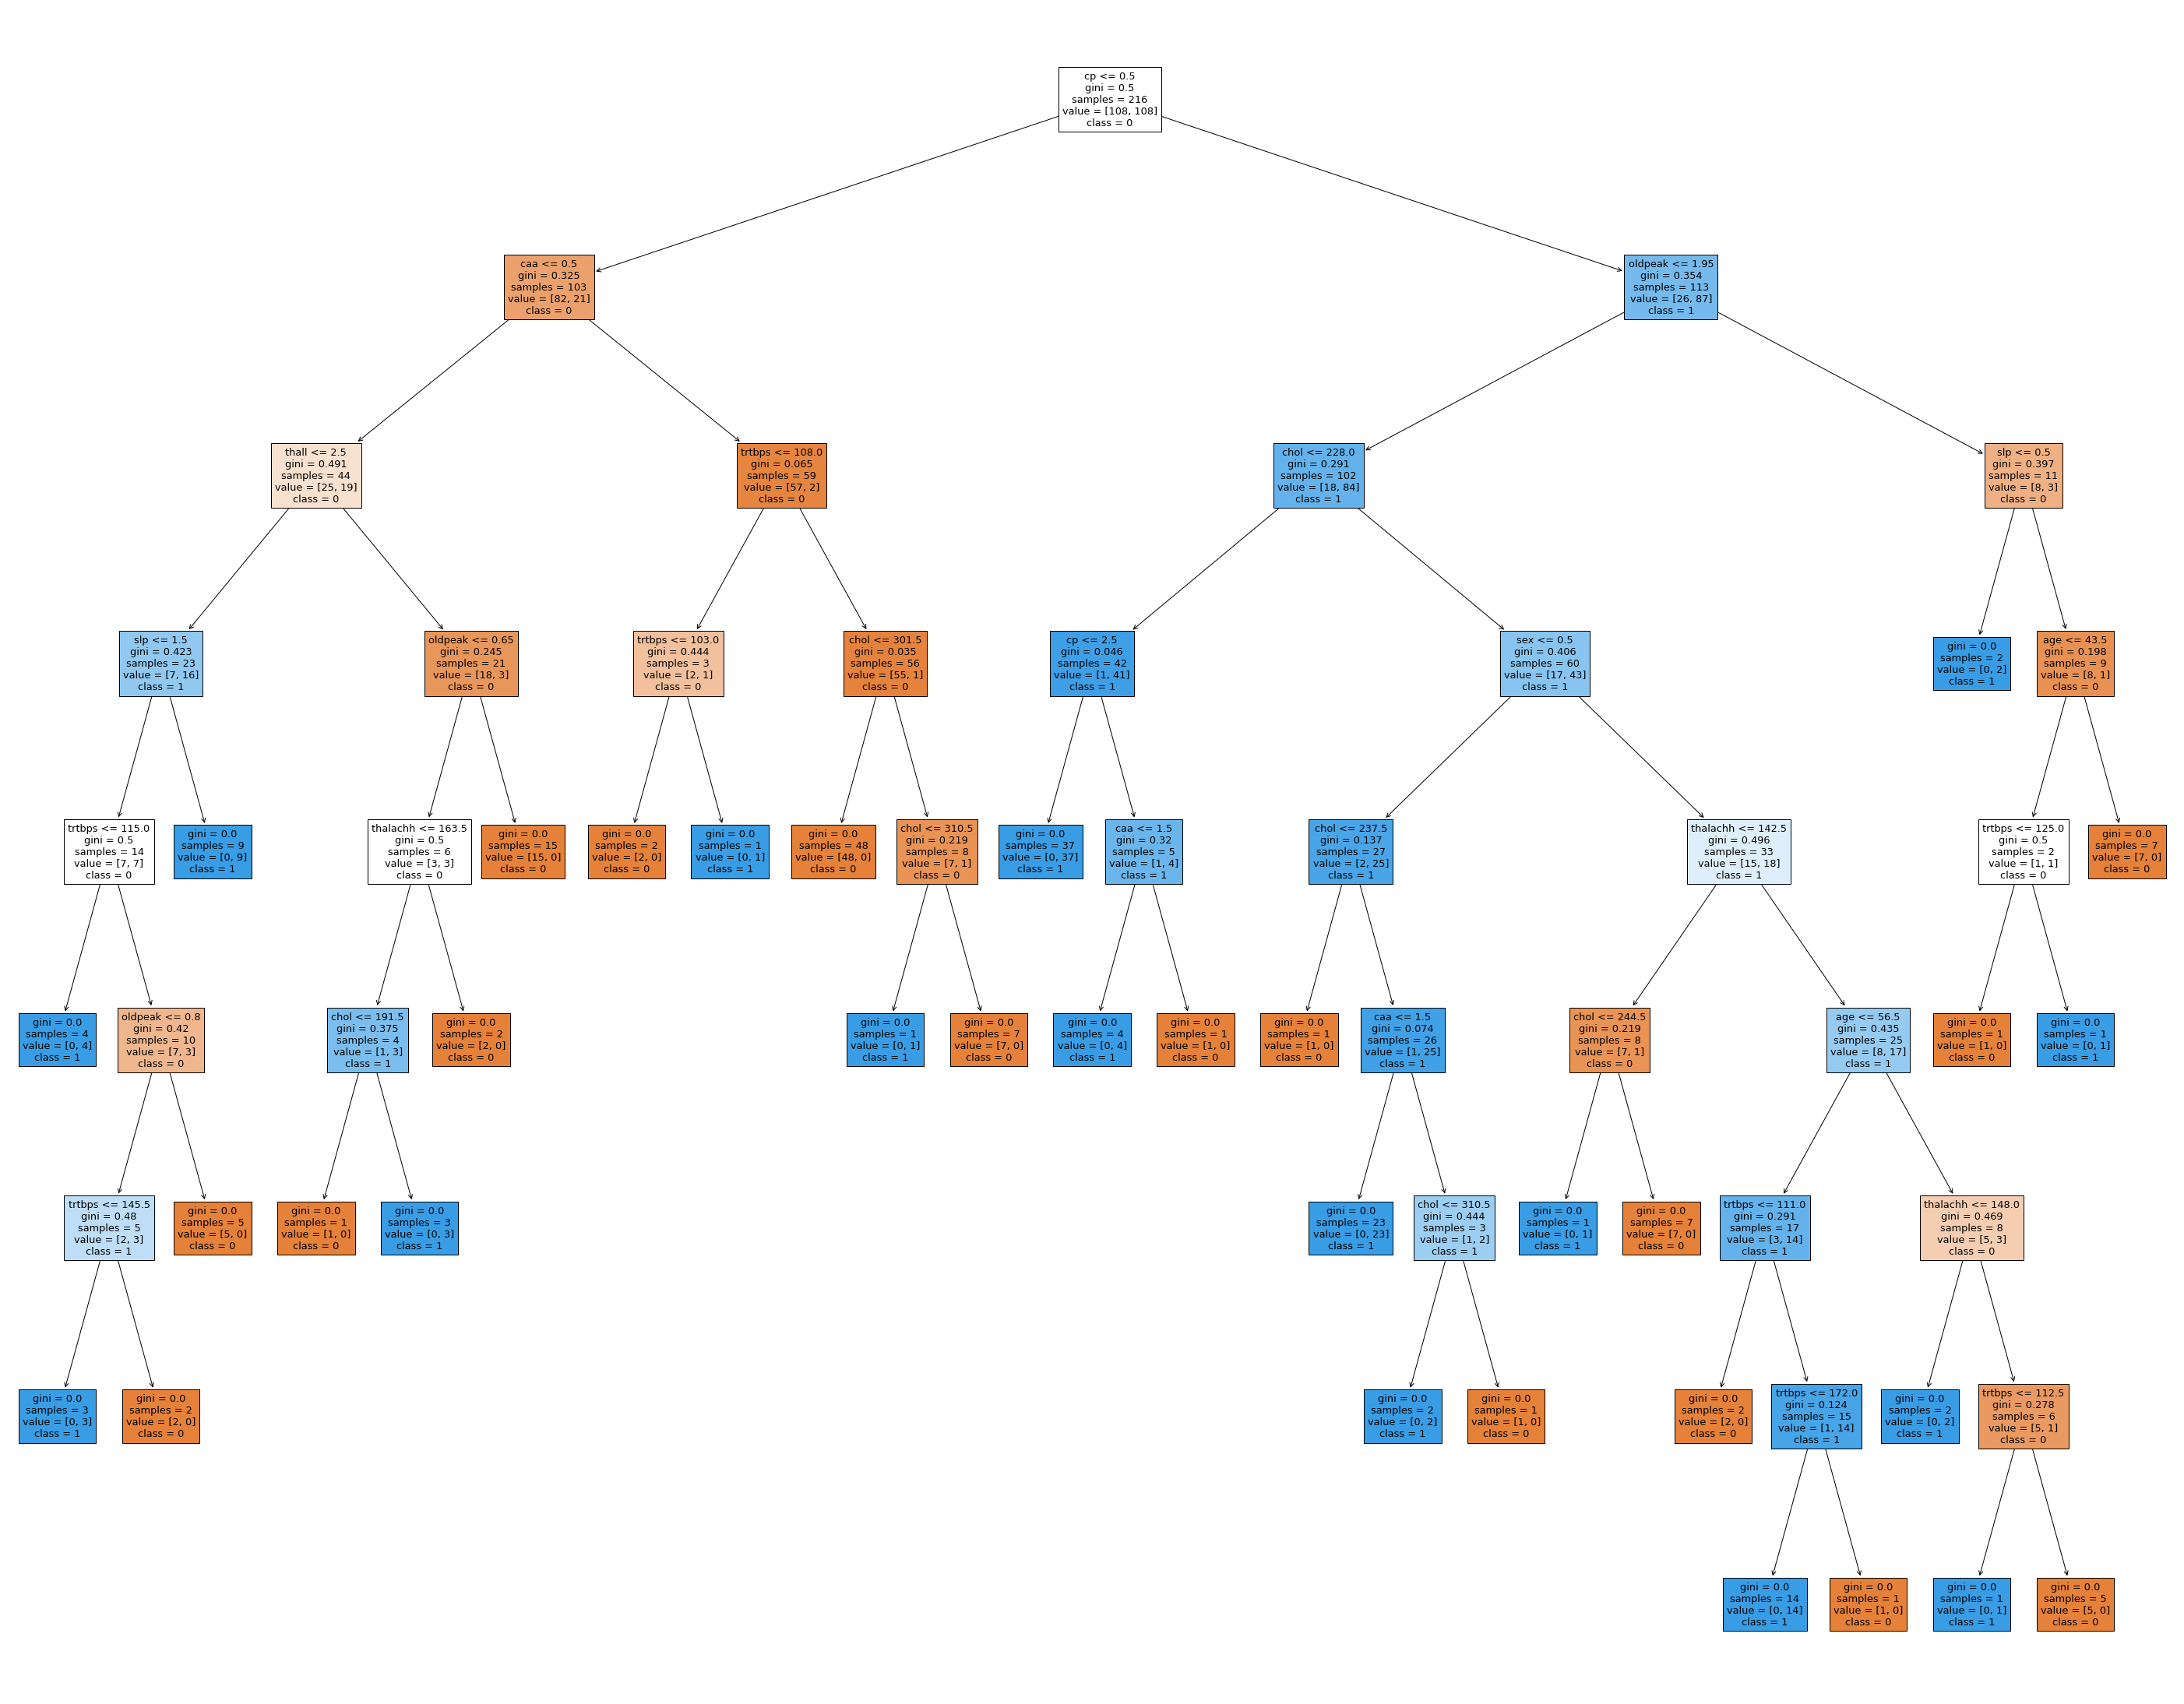

In [97]:
from sklearn import tree
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=x_treino.columns,  
                   class_names=['0','1'],
                   filled=True)

## Conclusão
Com a obtenção dos resultados de cada modelo de predição, podemos afirmar que a regressão logística conseguiu prever a variável target (output) com maior eficácia do que o modelo da Árvore de Decisão. O grupo acredita que conseguiu realizar o trabalho com sucesso e obter resultados plausíveis.


## Referências Bibliográficas
- Kaggle. Heart Attack Analysis & Prediction Dataset.
Disponível em: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
Acesso em: 03/06/2021